In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Upload the kaggle.json file here when prompted

# Move and configure it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API
!pip install -q kaggle

# Now download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d chest_xray


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from glob import glob
from tqdm import tqdm
from PIL import Image

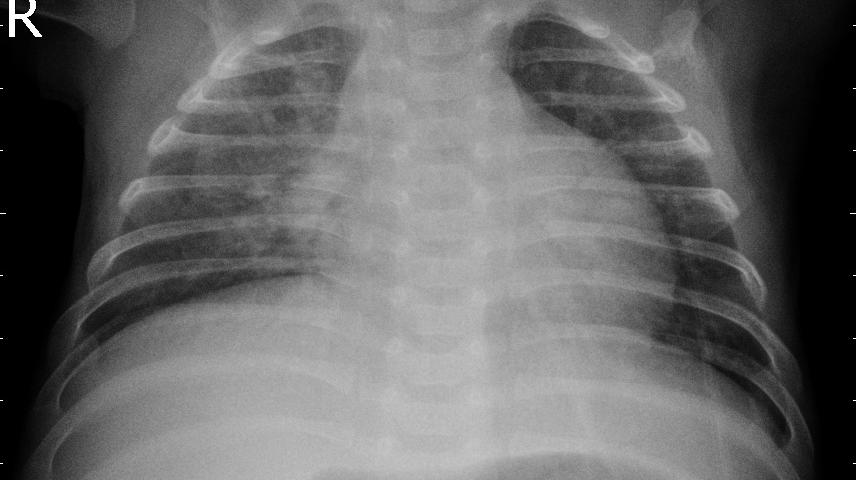

In [ ]:
Image.open(r'/content/chest_xray/chest_xray/chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg')

Building a DataMap

In [ ]:
def DataMap(folder_path):
    img = glob(folder_path + '/*.jpeg')
    clas = Path(folder_path).name
    split = Path(folder_path).parent.name
    return pd.DataFrame({
        'Image': img,
        'Class': clas,
        'Split': split
    })


In [124]:
train_normal = DataMap(r'/content/chest_xray/chest_xray/chest_xray/train/NORMAL')
train_pneumonia = DataMap(r'/content/chest_xray/chest_xray/chest_xray/train/PNEUMONIA')

test_normal = DataMap(r'/content/chest_xray/chest_xray/chest_xray/test/NORMAL')
test_pneumonia = DataMap(r'/content/chest_xray/chest_xray/chest_xray/test/PNEUMONIA')

val_normal = DataMap(r'/content/chest_xray/chest_xray/chest_xray/val/NORMAL')
val_pneumonia = DataMap(r'/content/chest_xray/chest_xray/chest_xray/val/PNEUMONIA')


In [125]:
val_normal

,Image,Class,Split
0,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
1,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
2,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
3,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
4,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
5,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
6,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val
7,/content/chest_xray/chest_xray/chest_xray/val/...,NORMAL,val


In [126]:
df = pd.concat([
    train_normal,
    train_pneumonia,
    test_normal,
    test_pneumonia,
    val_normal,
    val_pneumonia
], ignore_index=True)



In [127]:
df['Image'].sample(1)

,Image
2717,/content/chest_xray/chest_xray/chest_xray/trai...


In [128]:
sample = df['Image'].sample(1).values[0]

In [129]:
df.shape

(5856, 3)

In [130]:
img = Image.open(sample)

In [131]:
img.size


(1696, 1568)

In [132]:
WIDTH = 128
HEIGHT = 128


In [134]:
for i, row in tqdm( df.iterrows() , total=df.shape[0] ):

    img_path = row["Image"]
    img = Image.open(img_path)

    resized_img = img.resize((WIDTH, HEIGHT))

    img_path = Path(img_path)
    img_name = img_path.name
    img_clas = img_path.parent.name
    img_split = img_path.parent.parent.name
    final_img_name = img_split + "_" + img_clas + "_" +img_name

    # Updated final_img_path to include filename and extension
    final_img_path = os.path.join("/content/chest_xray/chest_xray/chest_xray/resizeddd/", final_img_name)
    resized_img.save(final_img_path)

100%|██████████| 5856/5856 [01:07<00:00, 86.12it/s] 


In [135]:
resized_imgs_paths = []

for i, row in tqdm( df.iterrows() , total=df.shape[0] ):

    img_path = row["Image"]
    img_path = Path(img_path)
    img_name = img_path.name
    img_class = img_path.parent.name
    img_split = img_path.parent.parent.name
    final_img_name = img_split + "_" + img_class + "_" +img_name

    final_img_path = os.path.join("/content/chest_xray/chest_xray/chest_xray/resizeddd/", final_img_name)

    resized_imgs_paths.append(final_img_path)

100%|██████████| 5856/5856 [00:00<00:00, 14490.52it/s]


In [136]:
df["resized"] = resized_imgs_paths

In [179]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor()
])


In [137]:
df

,Image,Class,Split,resized
0,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
1,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
2,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
3,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
4,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
...,...,...,...,...
5851,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...
5852,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...
5853,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...
5854,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...


In [138]:
df.to_csv("/content/chest_xray/chest_xray/data_map.csv", index=False)
df.to_csv("data_map.csv", index=False)

# **Training**

In [139]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from glob import glob
from tqdm import tqdm
from PIL import Image

In [140]:
data_map = pd.read_csv("/content/chest_xray/chest_xray/data_map.csv")
data_map.head()

,Image,Class,Split,resized
0,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
1,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
2,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
3,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...
4,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...


In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
lbl_encoder = LabelEncoder()
data_map["clas_enc"] = lbl_encoder.fit_transform(data_map["Class"])

In [143]:
data_map

,Image,Class,Split,resized,clas_enc
0,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...,0
1,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...,0
2,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...,0
3,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...,0
4,/content/chest_xray/chest_xray/chest_xray/trai...,NORMAL,train,/content/chest_xray/chest_xray/chest_xray/resi...,0
...,...,...,...,...,...
5851,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...,1
5852,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...,1
5853,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...,1
5854,/content/chest_xray/chest_xray/chest_xray/val/...,PNEUMONIA,val,/content/chest_xray/chest_xray/chest_xray/resi...,1


In [144]:
 data_map['resized'][1]

'/content/chest_xray/chest_xray/chest_xray/resizeddd/train_NORMAL_IM-0609-0001.jpeg'

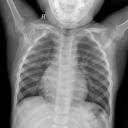

In [145]:
i = data_map['resized'][10]
Image.open(i)

In [146]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [147]:
class XrayDataset(Dataset):

    def __init__(self, df_split, transform):

        self.df_split = df_split
        self.transform = transform

    def __len__(self):
        return len(self.df_split)

    def __getitem__(self, index):

        img_path = self.df_split.iloc[index]["resized"]

        clas = self.df_split.iloc[index]["clas_enc"]

        img = Image.open(img_path).convert("L") #converting to grayscale

        img_trans = self.transform(img)

        return img_trans, clas


In [148]:
train_dataset = XrayDataset(data_map[data_map['Split'] == 'train'], transform=transforms.ToTensor())
val_dataset = XrayDataset(data_map[data_map['Split'] == 'val'], transform=transforms.ToTensor())
test_dataset = XrayDataset(data_map[data_map['Split'] == 'test'], transform=transforms.ToTensor())

In [149]:
train_dataset[10]

(tensor([[[0.2667, 0.2941, 0.3176,  ..., 0.0157, 0.0275, 0.0431],
          [0.2588, 0.2863, 0.3059,  ..., 0.0157, 0.0235, 0.0314],
          [0.2471, 0.2745, 0.2980,  ..., 0.0196, 0.0118, 0.0039],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0235, 0.0235],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0235, 0.0235],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0235, 0.0235]]]),
 np.int64(0))

In [150]:
data_map['Split'].value_counts()

,count
Split,
train,5216
test,624
val,16


In [183]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)

In [185]:
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# Changed 'nn.linear' to 'nn.Linear'
model.fc = nn.Linear(in_features=2048, out_features=2, bias=True)

In [153]:
 models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [167]:
# prompt: i want to use model = models. "EfficientNet-B0	"imagenet""

model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 99.6MB/s]


In [169]:
models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [176]:
device = torch.device("cuda")

In [177]:
device

device(type='cuda')

In [178]:
# Ensure that model and model2 are properly moved to the device without redefinition
model = model.to(device)

In [187]:
import os
import torch
from torch import nn, optim
from tqdm import tqdm

# Setup checkpoint saving directory
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Set up Adam optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss = nn.CrossEntropyLoss()

epochs = 20

# Move the model to the device (GPU) before the training loop
model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]")
    with torch.no_grad():
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_value = loss(outputs, labels)
            val_loss += loss_value.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = correct_val / total_val

    # Print metrics
    print(f"\nEpoch [{epoch+1}/{epochs}] Summary:")
    print(f"  Training Loss:     {epoch_train_loss:.4f}")
    print(f"  Training Accuracy: {epoch_train_acc:.4f}")
    print(f"  Validation Loss:   {epoch_val_loss:.4f}")
    print(f"  Validation Accuracy: {epoch_val_acc:.4f}")

    # Save model, optimizer, and epoch number after each epoch
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}.pth")
    torch.save(checkpoint, checkpoint_path)

Epoch 1/20 [Training]:   0%|          | 0/163 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]



Epoch [1/20] Summary:
  Training Loss:     0.3654
  Training Accuracy: 0.9237
  Validation Loss:   0.3615
  Validation Accuracy: 0.8125


Epoch 2/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]



Epoch [2/20] Summary:
  Training Loss:     0.0586
  Training Accuracy: 0.9774
  Validation Loss:   0.1113
  Validation Accuracy: 1.0000


Epoch 3/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]



Epoch [3/20] Summary:
  Training Loss:     0.0442
  Training Accuracy: 0.9835
  Validation Loss:   0.3915
  Validation Accuracy: 0.8125


Epoch 4/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]



Epoch [4/20] Summary:
  Training Loss:     0.0404
  Training Accuracy: 0.9852
  Validation Loss:   0.4318
  Validation Accuracy: 0.8125


Epoch 5/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]



Epoch [5/20] Summary:
  Training Loss:     0.0245
  Training Accuracy: 0.9896
  Validation Loss:   0.5199
  Validation Accuracy: 0.8125


Epoch 6/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]



Epoch [6/20] Summary:
  Training Loss:     0.0340
  Training Accuracy: 0.9898
  Validation Loss:   0.0857
  Validation Accuracy: 1.0000


Epoch 7/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]



Epoch [7/20] Summary:
  Training Loss:     0.0261
  Training Accuracy: 0.9923
  Validation Loss:   1.0645
  Validation Accuracy: 0.7500


Epoch 8/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]



Epoch [8/20] Summary:
  Training Loss:     0.0189
  Training Accuracy: 0.9933
  Validation Loss:   0.1299
  Validation Accuracy: 0.9375


Epoch 9/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]



Epoch [9/20] Summary:
  Training Loss:     0.0052
  Training Accuracy: 0.9983
  Validation Loss:   0.0901
  Validation Accuracy: 0.9375


Epoch 10/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]



Epoch [10/20] Summary:
  Training Loss:     0.0224
  Training Accuracy: 0.9914
  Validation Loss:   0.0339
  Validation Accuracy: 1.0000


Epoch 11/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]



Epoch [11/20] Summary:
  Training Loss:     0.0165
  Training Accuracy: 0.9937
  Validation Loss:   0.5480
  Validation Accuracy: 0.8750


Epoch 12/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]



Epoch [12/20] Summary:
  Training Loss:     0.0083
  Training Accuracy: 0.9967
  Validation Loss:   0.1392
  Validation Accuracy: 0.9375


Epoch 13/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]



Epoch [13/20] Summary:
  Training Loss:     0.0078
  Training Accuracy: 0.9971
  Validation Loss:   0.2219
  Validation Accuracy: 0.8125


Epoch 14/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]



Epoch [14/20] Summary:
  Training Loss:     0.0060
  Training Accuracy: 0.9981
  Validation Loss:   0.7857
  Validation Accuracy: 0.7500


Epoch 15/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]



Epoch [15/20] Summary:
  Training Loss:     0.0212
  Training Accuracy: 0.9935
  Validation Loss:   0.4661
  Validation Accuracy: 0.8750


Epoch 16/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]



Epoch [16/20] Summary:
  Training Loss:     0.0080
  Training Accuracy: 0.9973
  Validation Loss:   0.4248
  Validation Accuracy: 0.8750


Epoch 17/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]



Epoch [17/20] Summary:
  Training Loss:     0.0156
  Training Accuracy: 0.9950
  Validation Loss:   0.2110
  Validation Accuracy: 0.8750


Epoch 18/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]



Epoch [18/20] Summary:
  Training Loss:     0.0135
  Training Accuracy: 0.9958
  Validation Loss:   2.0706
  Validation Accuracy: 0.5625


Epoch 19/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]



Epoch [19/20] Summary:
  Training Loss:     0.0079
  Training Accuracy: 0.9973
  Validation Loss:   0.1831
  Validation Accuracy: 0.9375


Epoch 20/20 [Validation]: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]



Epoch [20/20] Summary:
  Training Loss:     0.0342
  Training Accuracy: 0.9883
  Validation Loss:   0.0904
  Validation Accuracy: 0.9375


In [202]:
print(checkpoint['model_state_dict'].keys())


odict_keys(['features.0.0.weight', 'features.0.1.weight', 'features.0.1.bias', 'features.0.1.running_mean', 'features.0.1.running_var', 'features.0.1.num_batches_tracked', 'features.1.0.block.0.0.weight', 'features.1.0.block.0.1.weight', 'features.1.0.block.0.1.bias', 'features.1.0.block.0.1.running_mean', 'features.1.0.block.0.1.running_var', 'features.1.0.block.0.1.num_batches_tracked', 'features.1.0.block.1.fc1.weight', 'features.1.0.block.1.fc1.bias', 'features.1.0.block.1.fc2.weight', 'features.1.0.block.1.fc2.bias', 'features.1.0.block.2.0.weight', 'features.1.0.block.2.1.weight', 'features.1.0.block.2.1.bias', 'features.1.0.block.2.1.running_mean', 'features.1.0.block.2.1.running_var', 'features.1.0.block.2.1.num_batches_tracked', 'features.2.0.block.0.0.weight', 'features.2.0.block.0.1.weight', 'features.2.0.block.0.1.bias', 'features.2.0.block.0.1.running_mean', 'features.2.0.block.0.1.running_var', 'features.2.0.block.0.1.num_batches_tracked', 'features.2.0.block.1.0.weight',

In [203]:
import torch
from torchvision import models
import torch.nn as nn

# Load the checkpoint
checkpoint = torch.load('/content/model_checkpoints/checkpoint_epoch_10.pth', map_location=torch.device('cuda'))

# Load EfficientNet-B0 with no pre-trained weights
model_at_epoch10 = models.efficientnet_b0(weights=None)

# Modify input conv layer for grayscale (1 channel instead of 3)
model_at_epoch10.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# Modify classifier for 2 output classes
model_at_epoch10.fc = nn.Linear(in_features=2048, out_features=2, bias=True)


#model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# Changed 'nn.linear' to 'nn.Linear'
#model.fc = nn.Linear(in_features=2048, out_features=2, bias=True)
# Load weights
model_at_epoch10.load_state_dict(checkpoint['model_state_dict'])

# Move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_at_epoch10.to(device)

# Eval mode
model_at_epoch10.eval()


RuntimeError: Error(s) in loading state_dict for EfficientNet:
	Unexpected key(s) in state_dict: "conv1.weight", "fc.weight", "fc.bias". 
	size mismatch for classifier.1.weight: copying a param with shape torch.Size([1000, 1280]) from checkpoint, the shape in current model is torch.Size([2, 1280]).
	size mismatch for classifier.1.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).

In [193]:
import timm
import torch
import torch.nn as nn

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load checkpoint
checkpoint_path = os.path.join(checkpoint_dir, "checkpoint_epoch_10.pth")
checkpoint = torch.load(checkpoint_path, map_location=device)

# Build the same model architecture (EfficientNet-b0 from timm)
model_at_epoch10 = timm.create_model('efficientnet_b0', pretrained=False)

# Modify input and output layers
model_at_epoch10.conv_stem = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
model_at_epoch10.classifier = nn.Linear(in_features=1280, out_features=2, bias=True)

# Load weights
model_at_epoch10.load_state_dict(checkpoint['model_state_dict'])

# Move to device
model_at_epoch10 = model_at_epoch10.to(device)
model_at_epoch10.eval()

# Save clean version if needed
torch.save(model_at_epoch10.state_dict(), 'model_at_epoch10_state_dict.pth')


RuntimeError: Error(s) in loading state_dict for EfficientNet:
	Missing key(s) in state_dict: "conv_stem.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "blocks.0.0.conv_dw.weight", "blocks.0.0.bn1.weight", "blocks.0.0.bn1.bias", "blocks.0.0.bn1.running_mean", "blocks.0.0.bn1.running_var", "blocks.0.0.se.conv_reduce.weight", "blocks.0.0.se.conv_reduce.bias", "blocks.0.0.se.conv_expand.weight", "blocks.0.0.se.conv_expand.bias", "blocks.0.0.conv_pw.weight", "blocks.0.0.bn2.weight", "blocks.0.0.bn2.bias", "blocks.0.0.bn2.running_mean", "blocks.0.0.bn2.running_var", "blocks.1.0.conv_pw.weight", "blocks.1.0.bn1.weight", "blocks.1.0.bn1.bias", "blocks.1.0.bn1.running_mean", "blocks.1.0.bn1.running_var", "blocks.1.0.conv_dw.weight", "blocks.1.0.bn2.weight", "blocks.1.0.bn2.bias", "blocks.1.0.bn2.running_mean", "blocks.1.0.bn2.running_var", "blocks.1.0.se.conv_reduce.weight", "blocks.1.0.se.conv_reduce.bias", "blocks.1.0.se.conv_expand.weight", "blocks.1.0.se.conv_expand.bias", "blocks.1.0.conv_pwl.weight", "blocks.1.0.bn3.weight", "blocks.1.0.bn3.bias", "blocks.1.0.bn3.running_mean", "blocks.1.0.bn3.running_var", "blocks.1.1.conv_pw.weight", "blocks.1.1.bn1.weight", "blocks.1.1.bn1.bias", "blocks.1.1.bn1.running_mean", "blocks.1.1.bn1.running_var", "blocks.1.1.conv_dw.weight", "blocks.1.1.bn2.weight", "blocks.1.1.bn2.bias", "blocks.1.1.bn2.running_mean", "blocks.1.1.bn2.running_var", "blocks.1.1.se.conv_reduce.weight", "blocks.1.1.se.conv_reduce.bias", "blocks.1.1.se.conv_expand.weight", "blocks.1.1.se.conv_expand.bias", "blocks.1.1.conv_pwl.weight", "blocks.1.1.bn3.weight", "blocks.1.1.bn3.bias", "blocks.1.1.bn3.running_mean", "blocks.1.1.bn3.running_var", "blocks.2.0.conv_pw.weight", "blocks.2.0.bn1.weight", "blocks.2.0.bn1.bias", "blocks.2.0.bn1.running_mean", "blocks.2.0.bn1.running_var", "blocks.2.0.conv_dw.weight", "blocks.2.0.bn2.weight", "blocks.2.0.bn2.bias", "blocks.2.0.bn2.running_mean", "blocks.2.0.bn2.running_var", "blocks.2.0.se.conv_reduce.weight", "blocks.2.0.se.conv_reduce.bias", "blocks.2.0.se.conv_expand.weight", "blocks.2.0.se.conv_expand.bias", "blocks.2.0.conv_pwl.weight", "blocks.2.0.bn3.weight", "blocks.2.0.bn3.bias", "blocks.2.0.bn3.running_mean", "blocks.2.0.bn3.running_var", "blocks.2.1.conv_pw.weight", "blocks.2.1.bn1.weight", "blocks.2.1.bn1.bias", "blocks.2.1.bn1.running_mean", "blocks.2.1.bn1.running_var", "blocks.2.1.conv_dw.weight", "blocks.2.1.bn2.weight", "blocks.2.1.bn2.bias", "blocks.2.1.bn2.running_mean", "blocks.2.1.bn2.running_var", "blocks.2.1.se.conv_reduce.weight", "blocks.2.1.se.conv_reduce.bias", "blocks.2.1.se.conv_expand.weight", "blocks.2.1.se.conv_expand.bias", "blocks.2.1.conv_pwl.weight", "blocks.2.1.bn3.weight", "blocks.2.1.bn3.bias", "blocks.2.1.bn3.running_mean", "blocks.2.1.bn3.running_var", "blocks.3.0.conv_pw.weight", "blocks.3.0.bn1.weight", "blocks.3.0.bn1.bias", "blocks.3.0.bn1.running_mean", "blocks.3.0.bn1.running_var", "blocks.3.0.conv_dw.weight", "blocks.3.0.bn2.weight", "blocks.3.0.bn2.bias", "blocks.3.0.bn2.running_mean", "blocks.3.0.bn2.running_var", "blocks.3.0.se.conv_reduce.weight", "blocks.3.0.se.conv_reduce.bias", "blocks.3.0.se.conv_expand.weight", "blocks.3.0.se.conv_expand.bias", "blocks.3.0.conv_pwl.weight", "blocks.3.0.bn3.weight", "blocks.3.0.bn3.bias", "blocks.3.0.bn3.running_mean", "blocks.3.0.bn3.running_var", "blocks.3.1.conv_pw.weight", "blocks.3.1.bn1.weight", "blocks.3.1.bn1.bias", "blocks.3.1.bn1.running_mean", "blocks.3.1.bn1.running_var", "blocks.3.1.conv_dw.weight", "blocks.3.1.bn2.weight", "blocks.3.1.bn2.bias", "blocks.3.1.bn2.running_mean", "blocks.3.1.bn2.running_var", "blocks.3.1.se.conv_reduce.weight", "blocks.3.1.se.conv_reduce.bias", "blocks.3.1.se.conv_expand.weight", "blocks.3.1.se.conv_expand.bias", "blocks.3.1.conv_pwl.weight", "blocks.3.1.bn3.weight", "blocks.3.1.bn3.bias", "blocks.3.1.bn3.running_mean", "blocks.3.1.bn3.running_var", "blocks.3.2.conv_pw.weight", "blocks.3.2.bn1.weight", "blocks.3.2.bn1.bias", "blocks.3.2.bn1.running_mean", "blocks.3.2.bn1.running_var", "blocks.3.2.conv_dw.weight", "blocks.3.2.bn2.weight", "blocks.3.2.bn2.bias", "blocks.3.2.bn2.running_mean", "blocks.3.2.bn2.running_var", "blocks.3.2.se.conv_reduce.weight", "blocks.3.2.se.conv_reduce.bias", "blocks.3.2.se.conv_expand.weight", "blocks.3.2.se.conv_expand.bias", "blocks.3.2.conv_pwl.weight", "blocks.3.2.bn3.weight", "blocks.3.2.bn3.bias", "blocks.3.2.bn3.running_mean", "blocks.3.2.bn3.running_var", "blocks.4.0.conv_pw.weight", "blocks.4.0.bn1.weight", "blocks.4.0.bn1.bias", "blocks.4.0.bn1.running_mean", "blocks.4.0.bn1.running_var", "blocks.4.0.conv_dw.weight", "blocks.4.0.bn2.weight", "blocks.4.0.bn2.bias", "blocks.4.0.bn2.running_mean", "blocks.4.0.bn2.running_var", "blocks.4.0.se.conv_reduce.weight", "blocks.4.0.se.conv_reduce.bias", "blocks.4.0.se.conv_expand.weight", "blocks.4.0.se.conv_expand.bias", "blocks.4.0.conv_pwl.weight", "blocks.4.0.bn3.weight", "blocks.4.0.bn3.bias", "blocks.4.0.bn3.running_mean", "blocks.4.0.bn3.running_var", "blocks.4.1.conv_pw.weight", "blocks.4.1.bn1.weight", "blocks.4.1.bn1.bias", "blocks.4.1.bn1.running_mean", "blocks.4.1.bn1.running_var", "blocks.4.1.conv_dw.weight", "blocks.4.1.bn2.weight", "blocks.4.1.bn2.bias", "blocks.4.1.bn2.running_mean", "blocks.4.1.bn2.running_var", "blocks.4.1.se.conv_reduce.weight", "blocks.4.1.se.conv_reduce.bias", "blocks.4.1.se.conv_expand.weight", "blocks.4.1.se.conv_expand.bias", "blocks.4.1.conv_pwl.weight", "blocks.4.1.bn3.weight", "blocks.4.1.bn3.bias", "blocks.4.1.bn3.running_mean", "blocks.4.1.bn3.running_var", "blocks.4.2.conv_pw.weight", "blocks.4.2.bn1.weight", "blocks.4.2.bn1.bias", "blocks.4.2.bn1.running_mean", "blocks.4.2.bn1.running_var", "blocks.4.2.conv_dw.weight", "blocks.4.2.bn2.weight", "blocks.4.2.bn2.bias", "blocks.4.2.bn2.running_mean", "blocks.4.2.bn2.running_var", "blocks.4.2.se.conv_reduce.weight", "blocks.4.2.se.conv_reduce.bias", "blocks.4.2.se.conv_expand.weight", "blocks.4.2.se.conv_expand.bias", "blocks.4.2.conv_pwl.weight", "blocks.4.2.bn3.weight", "blocks.4.2.bn3.bias", "blocks.4.2.bn3.running_mean", "blocks.4.2.bn3.running_var", "blocks.5.0.conv_pw.weight", "blocks.5.0.bn1.weight", "blocks.5.0.bn1.bias", "blocks.5.0.bn1.running_mean", "blocks.5.0.bn1.running_var", "blocks.5.0.conv_dw.weight", "blocks.5.0.bn2.weight", "blocks.5.0.bn2.bias", "blocks.5.0.bn2.running_mean", "blocks.5.0.bn2.running_var", "blocks.5.0.se.conv_reduce.weight", "blocks.5.0.se.conv_reduce.bias", "blocks.5.0.se.conv_expand.weight", "blocks.5.0.se.conv_expand.bias", "blocks.5.0.conv_pwl.weight", "blocks.5.0.bn3.weight", "blocks.5.0.bn3.bias", "blocks.5.0.bn3.running_mean", "blocks.5.0.bn3.running_var", "blocks.5.1.conv_pw.weight", "blocks.5.1.bn1.weight", "blocks.5.1.bn1.bias", "blocks.5.1.bn1.running_mean", "blocks.5.1.bn1.running_var", "blocks.5.1.conv_dw.weight", "blocks.5.1.bn2.weight", "blocks.5.1.bn2.bias", "blocks.5.1.bn2.running_mean", "blocks.5.1.bn2.running_var", "blocks.5.1.se.conv_reduce.weight", "blocks.5.1.se.conv_reduce.bias", "blocks.5.1.se.conv_expand.weight", "blocks.5.1.se.conv_expand.bias", "blocks.5.1.conv_pwl.weight", "blocks.5.1.bn3.weight", "blocks.5.1.bn3.bias", "blocks.5.1.bn3.running_mean", "blocks.5.1.bn3.running_var", "blocks.5.2.conv_pw.weight", "blocks.5.2.bn1.weight", "blocks.5.2.bn1.bias", "blocks.5.2.bn1.running_mean", "blocks.5.2.bn1.running_var", "blocks.5.2.conv_dw.weight", "blocks.5.2.bn2.weight", "blocks.5.2.bn2.bias", "blocks.5.2.bn2.running_mean", "blocks.5.2.bn2.running_var", "blocks.5.2.se.conv_reduce.weight", "blocks.5.2.se.conv_reduce.bias", "blocks.5.2.se.conv_expand.weight", "blocks.5.2.se.conv_expand.bias", "blocks.5.2.conv_pwl.weight", "blocks.5.2.bn3.weight", "blocks.5.2.bn3.bias", "blocks.5.2.bn3.running_mean", "blocks.5.2.bn3.running_var", "blocks.5.3.conv_pw.weight", "blocks.5.3.bn1.weight", "blocks.5.3.bn1.bias", "blocks.5.3.bn1.running_mean", "blocks.5.3.bn1.running_var", "blocks.5.3.conv_dw.weight", "blocks.5.3.bn2.weight", "blocks.5.3.bn2.bias", "blocks.5.3.bn2.running_mean", "blocks.5.3.bn2.running_var", "blocks.5.3.se.conv_reduce.weight", "blocks.5.3.se.conv_reduce.bias", "blocks.5.3.se.conv_expand.weight", "blocks.5.3.se.conv_expand.bias", "blocks.5.3.conv_pwl.weight", "blocks.5.3.bn3.weight", "blocks.5.3.bn3.bias", "blocks.5.3.bn3.running_mean", "blocks.5.3.bn3.running_var", "blocks.6.0.conv_pw.weight", "blocks.6.0.bn1.weight", "blocks.6.0.bn1.bias", "blocks.6.0.bn1.running_mean", "blocks.6.0.bn1.running_var", "blocks.6.0.conv_dw.weight", "blocks.6.0.bn2.weight", "blocks.6.0.bn2.bias", "blocks.6.0.bn2.running_mean", "blocks.6.0.bn2.running_var", "blocks.6.0.se.conv_reduce.weight", "blocks.6.0.se.conv_reduce.bias", "blocks.6.0.se.conv_expand.weight", "blocks.6.0.se.conv_expand.bias", "blocks.6.0.conv_pwl.weight", "blocks.6.0.bn3.weight", "blocks.6.0.bn3.bias", "blocks.6.0.bn3.running_mean", "blocks.6.0.bn3.running_var", "conv_head.weight", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "classifier.weight", "classifier.bias". 
	Unexpected key(s) in state_dict: "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.0.1.num_batches_tracked", "features.1.0.block.0.0.weight", "features.1.0.block.0.1.weight", "features.1.0.block.0.1.bias", "features.1.0.block.0.1.running_mean", "features.1.0.block.0.1.running_var", "features.1.0.block.0.1.num_batches_tracked", "features.1.0.block.1.fc1.weight", "features.1.0.block.1.fc1.bias", "features.1.0.block.1.fc2.weight", "features.1.0.block.1.fc2.bias", "features.1.0.block.2.0.weight", "features.1.0.block.2.1.weight", "features.1.0.block.2.1.bias", "features.1.0.block.2.1.running_mean", "features.1.0.block.2.1.running_var", "features.1.0.block.2.1.num_batches_tracked", "features.2.0.block.0.0.weight", "features.2.0.block.0.1.weight", "features.2.0.block.0.1.bias", "features.2.0.block.0.1.running_mean", "features.2.0.block.0.1.running_var", "features.2.0.block.0.1.num_batches_tracked", "features.2.0.block.1.0.weight", "features.2.0.block.1.1.weight", "features.2.0.block.1.1.bias", "features.2.0.block.1.1.running_mean", "features.2.0.block.1.1.running_var", "features.2.0.block.1.1.num_batches_tracked", "features.2.0.block.2.fc1.weight", "features.2.0.block.2.fc1.bias", "features.2.0.block.2.fc2.weight", "features.2.0.block.2.fc2.bias", "features.2.0.block.3.0.weight", "features.2.0.block.3.1.weight", "features.2.0.block.3.1.bias", "features.2.0.block.3.1.running_mean", "features.2.0.block.3.1.running_var", "features.2.0.block.3.1.num_batches_tracked", "features.2.1.block.0.0.weight", "features.2.1.block.0.1.weight", "features.2.1.block.0.1.bias", "features.2.1.block.0.1.running_mean", "features.2.1.block.0.1.running_var", "features.2.1.block.0.1.num_batches_tracked", "features.2.1.block.1.0.weight", "features.2.1.block.1.1.weight", "features.2.1.block.1.1.bias", "features.2.1.block.1.1.running_mean", "features.2.1.block.1.1.running_var", "features.2.1.block.1.1.num_batches_tracked", "features.2.1.block.2.fc1.weight", "features.2.1.block.2.fc1.bias", "features.2.1.block.2.fc2.weight", "features.2.1.block.2.fc2.bias", "features.2.1.block.3.0.weight", "features.2.1.block.3.1.weight", "features.2.1.block.3.1.bias", "features.2.1.block.3.1.running_mean", "features.2.1.block.3.1.running_var", "features.2.1.block.3.1.num_batches_tracked", "features.3.0.block.0.0.weight", "features.3.0.block.0.1.weight", "features.3.0.block.0.1.bias", "features.3.0.block.0.1.running_mean", "features.3.0.block.0.1.running_var", "features.3.0.block.0.1.num_batches_tracked", "features.3.0.block.1.0.weight", "features.3.0.block.1.1.weight", "features.3.0.block.1.1.bias", "features.3.0.block.1.1.running_mean", "features.3.0.block.1.1.running_var", "features.3.0.block.1.1.num_batches_tracked", "features.3.0.block.2.fc1.weight", "features.3.0.block.2.fc1.bias", "features.3.0.block.2.fc2.weight", "features.3.0.block.2.fc2.bias", "features.3.0.block.3.0.weight", "features.3.0.block.3.1.weight", "features.3.0.block.3.1.bias", "features.3.0.block.3.1.running_mean", "features.3.0.block.3.1.running_var", "features.3.0.block.3.1.num_batches_tracked", "features.3.1.block.0.0.weight", "features.3.1.block.0.1.weight", "features.3.1.block.0.1.bias", "features.3.1.block.0.1.running_mean", "features.3.1.block.0.1.running_var", "features.3.1.block.0.1.num_batches_tracked", "features.3.1.block.1.0.weight", "features.3.1.block.1.1.weight", "features.3.1.block.1.1.bias", "features.3.1.block.1.1.running_mean", "features.3.1.block.1.1.running_var", "features.3.1.block.1.1.num_batches_tracked", "features.3.1.block.2.fc1.weight", "features.3.1.block.2.fc1.bias", "features.3.1.block.2.fc2.weight", "features.3.1.block.2.fc2.bias", "features.3.1.block.3.0.weight", "features.3.1.block.3.1.weight", "features.3.1.block.3.1.bias", "features.3.1.block.3.1.running_mean", "features.3.1.block.3.1.running_var", "features.3.1.block.3.1.num_batches_tracked", "features.4.0.block.0.0.weight", "features.4.0.block.0.1.weight", "features.4.0.block.0.1.bias", "features.4.0.block.0.1.running_mean", "features.4.0.block.0.1.running_var", "features.4.0.block.0.1.num_batches_tracked", "features.4.0.block.1.0.weight", "features.4.0.block.1.1.weight", "features.4.0.block.1.1.bias", "features.4.0.block.1.1.running_mean", "features.4.0.block.1.1.running_var", "features.4.0.block.1.1.num_batches_tracked", "features.4.0.block.2.fc1.weight", "features.4.0.block.2.fc1.bias", "features.4.0.block.2.fc2.weight", "features.4.0.block.2.fc2.bias", "features.4.0.block.3.0.weight", "features.4.0.block.3.1.weight", "features.4.0.block.3.1.bias", "features.4.0.block.3.1.running_mean", "features.4.0.block.3.1.running_var", "features.4.0.block.3.1.num_batches_tracked", "features.4.1.block.0.0.weight", "features.4.1.block.0.1.weight", "features.4.1.block.0.1.bias", "features.4.1.block.0.1.running_mean", "features.4.1.block.0.1.running_var", "features.4.1.block.0.1.num_batches_tracked", "features.4.1.block.1.0.weight", "features.4.1.block.1.1.weight", "features.4.1.block.1.1.bias", "features.4.1.block.1.1.running_mean", "features.4.1.block.1.1.running_var", "features.4.1.block.1.1.num_batches_tracked", "features.4.1.block.2.fc1.weight", "features.4.1.block.2.fc1.bias", "features.4.1.block.2.fc2.weight", "features.4.1.block.2.fc2.bias", "features.4.1.block.3.0.weight", "features.4.1.block.3.1.weight", "features.4.1.block.3.1.bias", "features.4.1.block.3.1.running_mean", "features.4.1.block.3.1.running_var", "features.4.1.block.3.1.num_batches_tracked", "features.4.2.block.0.0.weight", "features.4.2.block.0.1.weight", "features.4.2.block.0.1.bias", "features.4.2.block.0.1.running_mean", "features.4.2.block.0.1.running_var", "features.4.2.block.0.1.num_batches_tracked", "features.4.2.block.1.0.weight", "features.4.2.block.1.1.weight", "features.4.2.block.1.1.bias", "features.4.2.block.1.1.running_mean", "features.4.2.block.1.1.running_var", "features.4.2.block.1.1.num_batches_tracked", "features.4.2.block.2.fc1.weight", "features.4.2.block.2.fc1.bias", "features.4.2.block.2.fc2.weight", "features.4.2.block.2.fc2.bias", "features.4.2.block.3.0.weight", "features.4.2.block.3.1.weight", "features.4.2.block.3.1.bias", "features.4.2.block.3.1.running_mean", "features.4.2.block.3.1.running_var", "features.4.2.block.3.1.num_batches_tracked", "features.5.0.block.0.0.weight", "features.5.0.block.0.1.weight", "features.5.0.block.0.1.bias", "features.5.0.block.0.1.running_mean", "features.5.0.block.0.1.running_var", "features.5.0.block.0.1.num_batches_tracked", "features.5.0.block.1.0.weight", "features.5.0.block.1.1.weight", "features.5.0.block.1.1.bias", "features.5.0.block.1.1.running_mean", "features.5.0.block.1.1.running_var", "features.5.0.block.1.1.num_batches_tracked", "features.5.0.block.2.fc1.weight", "features.5.0.block.2.fc1.bias", "features.5.0.block.2.fc2.weight", "features.5.0.block.2.fc2.bias", "features.5.0.block.3.0.weight", "features.5.0.block.3.1.weight", "features.5.0.block.3.1.bias", "features.5.0.block.3.1.running_mean", "features.5.0.block.3.1.running_var", "features.5.0.block.3.1.num_batches_tracked", "features.5.1.block.0.0.weight", "features.5.1.block.0.1.weight", "features.5.1.block.0.1.bias", "features.5.1.block.0.1.running_mean", "features.5.1.block.0.1.running_var", "features.5.1.block.0.1.num_batches_tracked", "features.5.1.block.1.0.weight", "features.5.1.block.1.1.weight", "features.5.1.block.1.1.bias", "features.5.1.block.1.1.running_mean", "features.5.1.block.1.1.running_var", "features.5.1.block.1.1.num_batches_tracked", "features.5.1.block.2.fc1.weight", "features.5.1.block.2.fc1.bias", "features.5.1.block.2.fc2.weight", "features.5.1.block.2.fc2.bias", "features.5.1.block.3.0.weight", "features.5.1.block.3.1.weight", "features.5.1.block.3.1.bias", "features.5.1.block.3.1.running_mean", "features.5.1.block.3.1.running_var", "features.5.1.block.3.1.num_batches_tracked", "features.5.2.block.0.0.weight", "features.5.2.block.0.1.weight", "features.5.2.block.0.1.bias", "features.5.2.block.0.1.running_mean", "features.5.2.block.0.1.running_var", "features.5.2.block.0.1.num_batches_tracked", "features.5.2.block.1.0.weight", "features.5.2.block.1.1.weight", "features.5.2.block.1.1.bias", "features.5.2.block.1.1.running_mean", "features.5.2.block.1.1.running_var", "features.5.2.block.1.1.num_batches_tracked", "features.5.2.block.2.fc1.weight", "features.5.2.block.2.fc1.bias", "features.5.2.block.2.fc2.weight", "features.5.2.block.2.fc2.bias", "features.5.2.block.3.0.weight", "features.5.2.block.3.1.weight", "features.5.2.block.3.1.bias", "features.5.2.block.3.1.running_mean", "features.5.2.block.3.1.running_var", "features.5.2.block.3.1.num_batches_tracked", "features.6.0.block.0.0.weight", "features.6.0.block.0.1.weight", "features.6.0.block.0.1.bias", "features.6.0.block.0.1.running_mean", "features.6.0.block.0.1.running_var", "features.6.0.block.0.1.num_batches_tracked", "features.6.0.block.1.0.weight", "features.6.0.block.1.1.weight", "features.6.0.block.1.1.bias", "features.6.0.block.1.1.running_mean", "features.6.0.block.1.1.running_var", "features.6.0.block.1.1.num_batches_tracked", "features.6.0.block.2.fc1.weight", "features.6.0.block.2.fc1.bias", "features.6.0.block.2.fc2.weight", "features.6.0.block.2.fc2.bias", "features.6.0.block.3.0.weight", "features.6.0.block.3.1.weight", "features.6.0.block.3.1.bias", "features.6.0.block.3.1.running_mean", "features.6.0.block.3.1.running_var", "features.6.0.block.3.1.num_batches_tracked", "features.6.1.block.0.0.weight", "features.6.1.block.0.1.weight", "features.6.1.block.0.1.bias", "features.6.1.block.0.1.running_mean", "features.6.1.block.0.1.running_var", "features.6.1.block.0.1.num_batches_tracked", "features.6.1.block.1.0.weight", "features.6.1.block.1.1.weight", "features.6.1.block.1.1.bias", "features.6.1.block.1.1.running_mean", "features.6.1.block.1.1.running_var", "features.6.1.block.1.1.num_batches_tracked", "features.6.1.block.2.fc1.weight", "features.6.1.block.2.fc1.bias", "features.6.1.block.2.fc2.weight", "features.6.1.block.2.fc2.bias", "features.6.1.block.3.0.weight", "features.6.1.block.3.1.weight", "features.6.1.block.3.1.bias", "features.6.1.block.3.1.running_mean", "features.6.1.block.3.1.running_var", "features.6.1.block.3.1.num_batches_tracked", "features.6.2.block.0.0.weight", "features.6.2.block.0.1.weight", "features.6.2.block.0.1.bias", "features.6.2.block.0.1.running_mean", "features.6.2.block.0.1.running_var", "features.6.2.block.0.1.num_batches_tracked", "features.6.2.block.1.0.weight", "features.6.2.block.1.1.weight", "features.6.2.block.1.1.bias", "features.6.2.block.1.1.running_mean", "features.6.2.block.1.1.running_var", "features.6.2.block.1.1.num_batches_tracked", "features.6.2.block.2.fc1.weight", "features.6.2.block.2.fc1.bias", "features.6.2.block.2.fc2.weight", "features.6.2.block.2.fc2.bias", "features.6.2.block.3.0.weight", "features.6.2.block.3.1.weight", "features.6.2.block.3.1.bias", "features.6.2.block.3.1.running_mean", "features.6.2.block.3.1.running_var", "features.6.2.block.3.1.num_batches_tracked", "features.6.3.block.0.0.weight", "features.6.3.block.0.1.weight", "features.6.3.block.0.1.bias", "features.6.3.block.0.1.running_mean", "features.6.3.block.0.1.running_var", "features.6.3.block.0.1.num_batches_tracked", "features.6.3.block.1.0.weight", "features.6.3.block.1.1.weight", "features.6.3.block.1.1.bias", "features.6.3.block.1.1.running_mean", "features.6.3.block.1.1.running_var", "features.6.3.block.1.1.num_batches_tracked", "features.6.3.block.2.fc1.weight", "features.6.3.block.2.fc1.bias", "features.6.3.block.2.fc2.weight", "features.6.3.block.2.fc2.bias", "features.6.3.block.3.0.weight", "features.6.3.block.3.1.weight", "features.6.3.block.3.1.bias", "features.6.3.block.3.1.running_mean", "features.6.3.block.3.1.running_var", "features.6.3.block.3.1.num_batches_tracked", "features.7.0.block.0.0.weight", "features.7.0.block.0.1.weight", "features.7.0.block.0.1.bias", "features.7.0.block.0.1.running_mean", "features.7.0.block.0.1.running_var", "features.7.0.block.0.1.num_batches_tracked", "features.7.0.block.1.0.weight", "features.7.0.block.1.1.weight", "features.7.0.block.1.1.bias", "features.7.0.block.1.1.running_mean", "features.7.0.block.1.1.running_var", "features.7.0.block.1.1.num_batches_tracked", "features.7.0.block.2.fc1.weight", "features.7.0.block.2.fc1.bias", "features.7.0.block.2.fc2.weight", "features.7.0.block.2.fc2.bias", "features.7.0.block.3.0.weight", "features.7.0.block.3.1.weight", "features.7.0.block.3.1.bias", "features.7.0.block.3.1.running_mean", "features.7.0.block.3.1.running_var", "features.7.0.block.3.1.num_batches_tracked", "features.8.0.weight", "features.8.1.weight", "features.8.1.bias", "features.8.1.running_mean", "features.8.1.running_var", "features.8.1.num_batches_tracked", "conv1.weight", "fc.weight", "fc.bias", "classifier.1.weight", "classifier.1.bias". 

In [195]:
import torch
from torchvision import models
import torch.nn as nn

# Load checkpoint
checkpoint = torch.load("model_epoch_10.pth", map_location="cuda")  # Use GPU if available

# Create the same model structure you used before saving
model = models.efficientnet_b0(weights=None)  # Do NOT use pretrained weights
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)  # change input to 1 channel

# Modify classifier to match saved model
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 3)  # You used 3 output classes

# Now load the saved weights safely
model.load_state_dict(checkpoint['model_state_dict'])

# Move to device if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Done — model is now ready as it was at epoch 10


FileNotFoundError: [Errno 2] No such file or directory: 'model_epoch_10.pth'

In [192]:
# Initialize the same base model
model = models.efficientnet_b0(weights=None)

# Load the saved weights
model.load_state_dict(torch.load('model_at_epoch10_state_dict.pth'))

# Move to device
model = model.to(device)
model.eval()


FileNotFoundError: [Errno 2] No such file or directory: 'model_at_epoch10_state_dict.pth'

In [211]:
model.load_state_dict(torch.load('model_at_epoch10_state_dict.pth'))

FileNotFoundError: [Errno 2] No such file or directory: 'model_at_epoch10_state_dict.pth'

In [213]:
import torch
from torch import nn
from torchvision import models

# 1. Create the model architecture (same as you originally did)
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

# Modify first layer for grayscale input (1 channel instead of 3)
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# Modify classifier head for 2 output classes
model.classifier[1] = nn.Linear(in_features=1280, out_features=2, bias=True)

# 2. Load the checkpoint
checkpoint_path = "/content/model_checkpoints/checkpoint_epoch_10.pth"
checkpoint = torch.load(checkpoint_path)

# 3. Load the weights into the model
model.load_state_dict(checkpoint['model_state_dict'])

# Move model to appropriate device (GPU if available)
device = torch.device("cuda")
model = model.to(device)

# Set model to evaluation mode if you're using it for inference
model.eval()

RuntimeError: Error(s) in loading state_dict for EfficientNet:
	Unexpected key(s) in state_dict: "conv1.weight", "fc.weight", "fc.bias". 
	size mismatch for classifier.1.weight: copying a param with shape torch.Size([1000, 1280]) from checkpoint, the shape in current model is torch.Size([2, 1280]).
	size mismatch for classifier.1.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).

In [206]:
img_path = '/content/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'
img = Image.open(img_path).convert("L")
img_trans = transforms.ToTensor()(img).unsqueeze(0).to(device)
preds = model(img_trans)
clas_index = torch.argmax(preds).item()
lbl_encoder.inverse_transform([clas_index])[0]


RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 1, 536, 880] to have 3 channels, but got 1 channels instead